In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 1- choose the file name and the file version

In [19]:
version = 1
file_name = 'm000000.ovf'
with open(file_name) as file:
    file_content = file.read()
if version==1:
    header_end = 29
else:
    header_end = 28
        

# 2- Reading the file content

In [20]:
file_content_lined = file_content.splitlines()
header = file_content_lined[0:header_end]
data = file_content_lined[header_end:-2]
header_for_dic = header[1::] #removing the first line of the header
header_for_dic = [x.replace('# ', '') for x in header_for_dic]
header_for_dic = [x.replace(' ','') for x in header_for_dic]
header_for_dic = [x.split(':') for x in header_for_dic]
header_for_dic = [x if len(x)==2 else x[1::] for x in header_for_dic]
header_dic = dict(header_for_dic)

In [21]:
mx = [x.split(' ')[0] for x in data]
my = [x.split(' ')[1] for x in data]
mz = [x.split(' ')[2] for x in data]
xnodes = np.int(header_dic['xnodes'])
ynodes = np.int(header_dic['ynodes'])
znodes = np.int(header_dic['znodes'])

In [22]:
def m_reshape(m):
    mx = np.array(m)
    mx = np.double(mx)
    mx = mx.reshape([ynodes,xnodes,znodes])
    #mx = np.flip(mx , axis = 0)
    return mx

In [23]:
mx = m_reshape(mx)
my = m_reshape(my)
mz = m_reshape(mz)

# 3- Using the data 
now you have 3 n by m by p arrays of mx, my, mz. x increases along a row, y decrease along a column and z increases along the depth. The image you will see by plt.imshow is the y-flipped version what you would see in oommf or mumax so if you want to see it as in oommf or mumax you need to flip it. Just flip it for the showing reason. You also have a dictionary data structure named header_dic where all the data pairs of the header are stored.

## showing the first z slice of the data

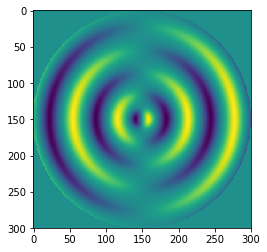

In [24]:
%matplotlib inline
plt.imshow(np.flip(mx[:,:,0], axis = 0))

## The header data

In [25]:
header_dic

{'Begin': 'DataText',
 'End': 'Header',
 'Segmentcount': '1',
 'Time(s)': '1.9284516251997033e-09',
 'Title': 'm',
 'ValueRangeMaxMag': '1',
 'ValueRangeMinMag': '1e-08',
 'meshtype': 'rectangular',
 'meshunit': 'm',
 'valuemultiplier': '1',
 'valueunit': '',
 'xbase': '5e-10',
 'xmax': '3.0000000000000004e-07',
 'xmin': '0',
 'xnodes': '300',
 'xstepsize': '1e-09',
 'ybase': '5e-10',
 'ymax': '3.0000000000000004e-07',
 'ymin': '0',
 'ynodes': '300',
 'ystepsize': '1e-09',
 'zbase': '5e-10',
 'zmax': '1e-09',
 'zmin': '0',
 'znodes': '1',
 'zstepsize': '1e-09'}

## let's say we want to draw the y = 100nm row of the data. 

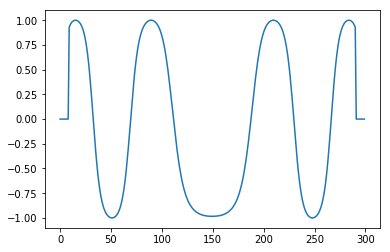

In [26]:
y = 100e-9
ystepsize = np.float(header_dic['ystepsize'])
row_number = np.int(np.floor(y/ystepsize))
plt.plot(mz[row_number,:, 0])